In [1]:
import time
import os
import sys
import numpy as np
import matplotlib
matplotlib.use('nbagg')
#from matplotlib import style
#style.use('ggplot')
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

from astropy.io import fits
from mmtwfs.wfs import *
from mmtwfs.zernike import ZernikeVector

In [55]:
mmirs = WFSFactory(wfs="mmirs", nzern=20)

<IPython.core.display.Javascript object>


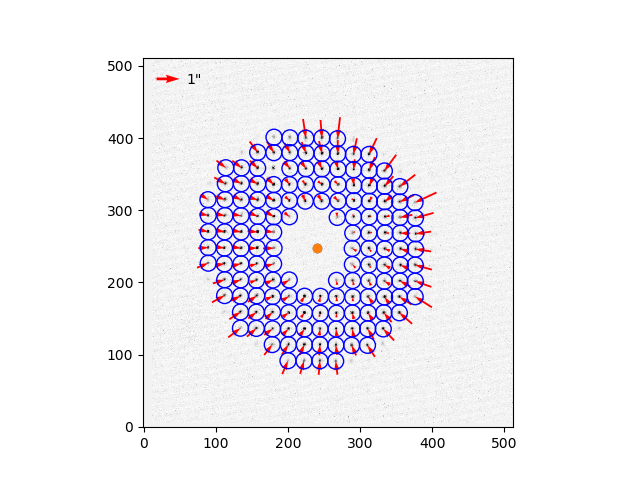

In [69]:
mmirs_file = "/Users/tim/MMT/wfsdat/20170416/rawdata/mmirs_wfs_%04d.fits" % 150
results = mmirs.measure_slopes(mmirs_file, 'mmirs2', plot=True)
plt.show()
time.sleep(1)

0.1546848689877555 arcsec
Fringe Coefficients
 Z02:  1.35e+03 nm 	 X Tilt (1, 1)
 Z03:       917 nm 	 Y Tilt (1, -1)
 Z04:       263 nm 	 Defocus (2, 0)
 Z05:      31.4 nm 	 Primary Astig at 45˚ (2, -2)
 Z06:       200 nm 	 Primary Astig at 0˚ (2, 2)
 Z07:      -351 nm 	 Primary Y Coma (3, -1)
 Z08:      -602 nm 	 Primary X Coma (3, 1)
 Z09:        60 nm 	 Y Trefoil (3, -3)
 Z10:      -250 nm 	 X Trefoil (3, 3)
 Z11:     -32.9 nm 	 Primary Spherical (4, 0)
 Z12:      -146 nm 	 Secondary Astigmatism at 0˚ (4, 2)
 Z13:     -91.6 nm 	 Secondary Astigmatism at 45˚ (4, -2)
 Z14:     -6.69 nm 	 X Tetrafoil (4, 4)
 Z15:      -101 nm 	 Y Tetrafoil (4, -4)
 Z16:       220 nm 	 Secondary X Coma (5, 1)
 Z17:       213 nm 	 Secondary Y Coma (5, -1)
 Z18:      92.3 nm 	 Secondary X Trefoil (5, 3)
 Z19:     -8.71 nm 	 Secondary Y Trefoil (5, -3)
 Z20:      93.2 nm 	 X Pentafoil (5, 5)
 Z21:      65.8 nm 	 Y Pentafoil (5, -5)



<IPython.core.display.Javascript object>


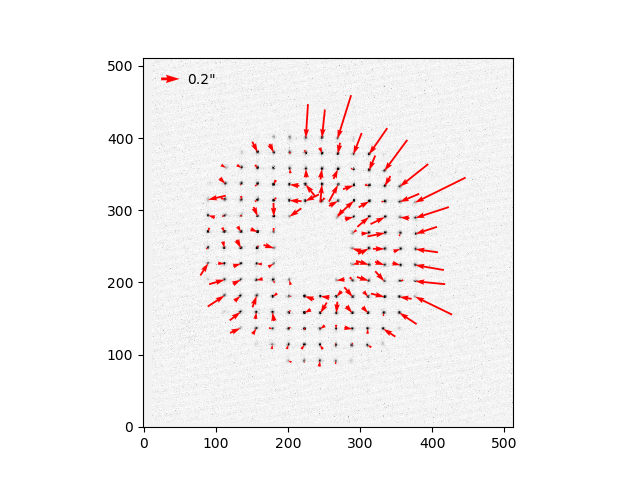

In [70]:
zresults = mmirs.fit_wavefront(results, plot=True)
zv = zresults['zernike']
print(zresults['residual_rms'])
print(zv)
plt.show()

In [ ]:
from astroscrappy import detect_cosmics

In [ ]:
mask, newim = detect_cosmics(results['data'])

In [ ]:
plt.imshow(results['data']-newim, origin='lower')
plt.show()

In [ ]:
im = results['data']
back = background(im, h=0.7)
subt = im - back

ycen, xcen = 232, 249
n = im.shape[0]
r = 0.5*n
y, x = np.ogrid[-ycen:n-ycen, -xcen:n-xcen]

mask = x**2 + y**2 < r**2
subt[mask] = np.nan

norm = visualization.ImageNormalize(
    subt,
    interval=visualization.ZScaleInterval(),
    stretch=visualization.AsinhStretch()
)
plt.imshow(subt, norm=norm, origin='lower')
plt.show()
s = subt.copy()
np.nanstd(s)

In [ ]:
back_subs = np.where()

# F/9 Dev Section

<IPython.core.display.Javascript object>


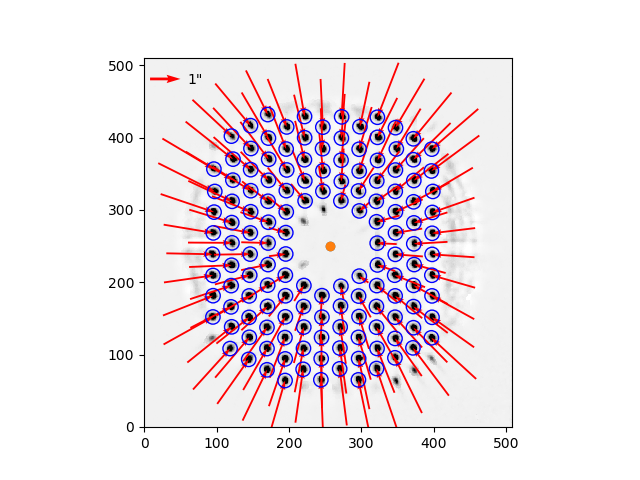

In [72]:
f9wfs = WFSFactory(wfs="f9", nzern=20)
f9_file = "/Users/tim/MMT/wfsdat/20170318/TREX_p500_0000.fits"
results = f9wfs.measure_slopes(f9_file, 'blue', plot=True)
plt.show()
# 265 258
# ref 240 259.5

Fringe Coefficients
 Z02:       116 nm 	 X Tilt (1, 1)
 Z03:     -92.1 nm 	 Y Tilt (1, -1)
 Z04:       156 nm 	 Defocus (2, 0)
 Z05:      25.6 nm 	 Primary Astig at 45˚ (2, -2)
 Z06:       362 nm 	 Primary Astig at 0˚ (2, 2)
 Z07:      15.4 nm 	 Primary Y Coma (3, -1)
 Z08:      6.78 nm 	 Primary X Coma (3, 1)
 Z09:       474 nm 	 Y Trefoil (3, -3)
 Z10:       155 nm 	 X Trefoil (3, 3)
 Z11:     0.188 nm 	 Primary Spherical (4, 0)
 Z12:       -27 nm 	 Secondary Astigmatism at 0˚ (4, 2)
 Z13:       126 nm 	 Secondary Astigmatism at 45˚ (4, -2)
 Z14:      -106 nm 	 X Tetrafoil (4, 4)
 Z15:      14.2 nm 	 Y Tetrafoil (4, -4)
 Z16:      -175 nm 	 Secondary X Coma (5, 1)
 Z17:     -23.6 nm 	 Secondary Y Coma (5, -1)
 Z18:     -1.04 nm 	 Secondary X Trefoil (5, 3)
 Z19:      23.8 nm 	 Secondary Y Trefoil (5, -3)
 Z20:      28.6 nm 	 X Pentafoil (5, 5)
 Z21:       155 nm 	 Y Pentafoil (5, -5)



<IPython.core.display.Javascript object>


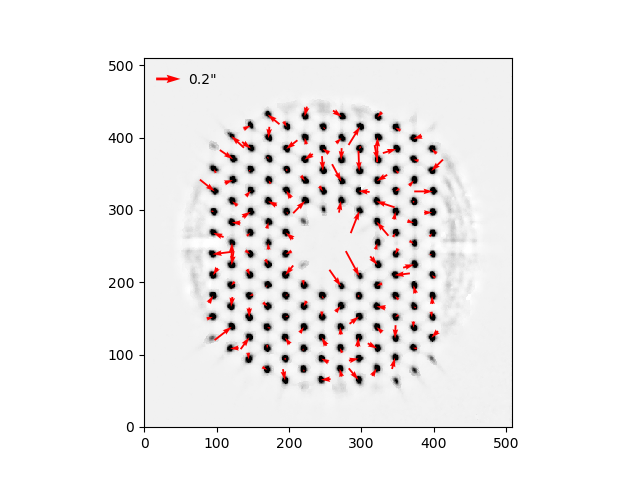

In [73]:
zresults = f9wfs.fit_wavefront(results, plot=True)
#zresults['zernike'].rotate(90*u.deg)
print(zresults['zernike'])
plt.show()

In [62]:
int(zresults['zernike']['Z10'].value)

474

In [ ]:
zv = zresults['zernike']
zv.ignore('Z02')
zv.ignore('Z03')
zv.plot_map()
plt.show()

# F/5 Dev Section

<IPython.core.display.Javascript object>


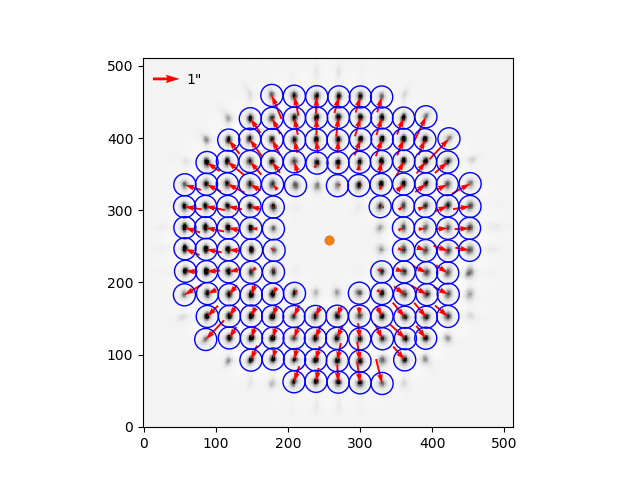

In [65]:
f5wfs = WFSFactory(wfs="f5", nzern=20)
f5_file = "/Users/tim/MMT/wfsdat/20170301/auto_wfs_0037_ave.fits"
results = f5wfs.measure_slopes(f5_file, 'hecto', plot=True)
plt.show()

Fringe Coefficients
 Z02:       393 nm 	 X Tilt (1, 1)
 Z03:       176 nm 	 Y Tilt (1, -1)
 Z04:       215 nm 	 Defocus (2, 0)
 Z05:      -469 nm 	 Primary Astig at 45˚ (2, -2)
 Z06:       203 nm 	 Primary Astig at 0˚ (2, 2)
 Z07:       256 nm 	 Primary Y Coma (3, -1)
 Z08:       150 nm 	 Primary X Coma (3, 1)
 Z09:      88.1 nm 	 Y Trefoil (3, -3)
 Z10:      82.3 nm 	 X Trefoil (3, 3)
 Z11:       734 nm 	 Primary Spherical (4, 0)
 Z12:      -124 nm 	 Secondary Astigmatism at 0˚ (4, 2)
 Z13:      89.1 nm 	 Secondary Astigmatism at 45˚ (4, -2)
 Z14:     -72.2 nm 	 X Tetrafoil (4, 4)
 Z15:     -85.3 nm 	 Y Tetrafoil (4, -4)
 Z16:       109 nm 	 Secondary X Coma (5, 1)
 Z17:     -37.7 nm 	 Secondary Y Coma (5, -1)
 Z18:      45.1 nm 	 Secondary X Trefoil (5, 3)
 Z19:      21.3 nm 	 Secondary Y Trefoil (5, -3)
 Z20:     -56.3 nm 	 X Pentafoil (5, 5)
 Z21:      12.1 nm 	 Y Pentafoil (5, -5)



<IPython.core.display.Javascript object>


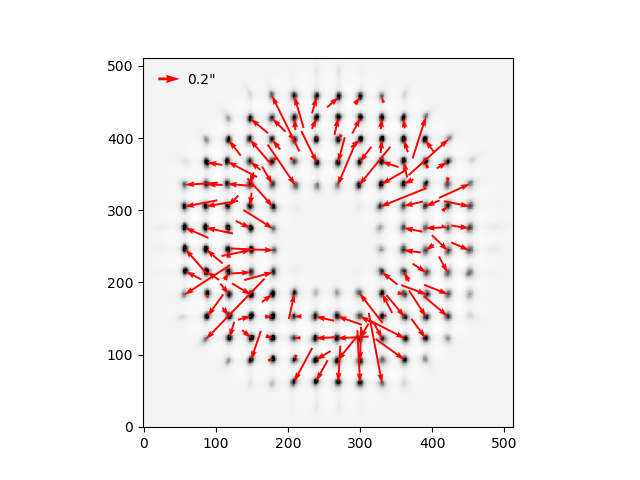

In [66]:
zresults = f5wfs.fit_wavefront(results, plot=True)
zv = zresults['zernike']
print(zv)
plt.show()

In [ ]:
zv.ignore('Z02')
zv.ignore('Z03')
zv.ignore('Z04')
print(zv.rms)
zv.plot_map()
plt.show()

In [ ]:
zresults['rot_zernike'] - zresults['zernike']

In [ ]:
zv.ignore('Z02')
zv.ignore('Z03')
print(zv.rms)
zv.plot_map()
plt.show()

In [ ]:
pup = f5wfs.pupil_mask(rotator=0)
plt.imshow(pup)
plt.show()

In [ ]:
im = check_wfsdata(f5_file)
back = background(im, h=0.9)
plt.imshow(im-back, origin='lower')
plt.show()

In [ ]:
subt = im - back
fits.writeto("blah.fits", subt, overwrite=True)

# Scratch space

In [ ]:
cen = center_pupil(subt, pup, plot=True)
print(cen)
plt.show()

In [ ]:
from astropy.io import ascii

In [ ]:
t = f9wfs.telescope
m = t.zern_map

In [ ]:
z = np.loadtxt("/Users/tim/MMT/wfsdat/20170110/mmirs_wfs_0375.dao.sub.zrn.cor")
z1 = np.loadtxt("/Users/tim/MMT/wfsdat/20170110/mmirs_wfs_0375.dao.av.zrn")

In [ ]:
z1 - z

In [ ]:
Z = ZernikeVector(coeffs=z, zmap=m)

In [ ]:
Z

In [ ]:
from astropy.table import Table
from astropy.io import ascii

In [ ]:
t = ascii.read("/Users/tim/MMT/mmtwfs/mmtwfs/data/mmirszernfield.tab")

In [ ]:
t

In [ ]:
np.interp(0.12, t['field_r'], t['Z01'])

In [ ]:
range(4, 11)

In [ ]:
for i in range(4, 12):
    print("Z%02d" % i)

In [ ]:
np.max(1, 2)

In [ ]:
6.75 + 20.30 + 242.15 + 430.51

In [ ]:
13296 - (973.15/.575) - 1025.8

In [ ]:
23*6 + 12*6

In [ ]:
58.69*12

In [ ]:
210+16+69.5+704.28

In [ ]:
2225.37 - (977.15 + 999.78 + 699.71)

In [ ]:
103212.81+341.47-451.27+9632.5

In [ ]:
7324.5+3951.34

In [ ]:
112735.51 - (11275.84 + 7245.8 + 56) - 12150

In [ ]:
4050*3

In [ ]:
3000*.05

In [ ]:
28910/98610

In [ ]:
ai = [247.68, 252.69, 257.79, 261.79, 266.88, 696.98, 280.11, 261.96, 261.96, 261.92, 261.96]
pep = [146.43, 147.28, 145.18, 142.83, 140.7, 138.47, 136.4, 134.18, 132.18, 129.89, 128.12, 126.22]

In [ ]:
0.2* (28910/98610 * (np.sum(ai) + np.sum(pep)))

In [ ]:
len(pep)

In [ ]:
12049 - (290.81 + 850)

In [ ]:
18577.64-7324.5

In [ ]:
110940.01-11253.14 - 9600

In [ ]:
0.032 * 90086.87 + 4226.63

In [48]:
x = 1920 * 5.86e-3 * u.mm

y = 1200 * 5.86e-3 * u.mm

In [54]:
np.sqrt(x**2 + y**2)

<Quantity 13.267951064124407 mm>